# MNIST
We will build a handwritten digits classifier using a neural network.

References: \
https://github.com/PacktPublishing/Deep-Learning-with-Keras/tree/master/Chapter01 \
https://github.com/oreilly-japan/deep-learning-with-keras-ja/tree/master/ch01



In [1]:
!pip install --upgrade keras
!pip install np_utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=5db9bdf2d47b9cf808f7b07150e1fdd70684eb70fce8d3bd4e814ae0c1e42e08
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [2]:
# Libraries
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import to_categorical

In [3]:
# Loading data
# Data: shuffling and spliting
np.random.seed(5511) # for reproducibility
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784 ... 2D(28*28) to 1D(1*728)
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
NB_CLASSES = 10   # number of outputs = number of digits
Y_train = to_categorical(y_train, NB_CLASSES)
Y_test = to_categorical(y_test, NB_CLASSES)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
60000 train samples
10000 test samples


# 1st Approach

### Model 1-1
*Architecture*: \
Input(728 reshaped)→Dense (10 nodes outputs)→Softmax (activation) \
- The most basic model

In [ ]:
# Hyperparameters for network and training
np.random.seed(5511) # for reproducibility
NB_EPOCH = 20
BATCH_SIZE = 128
OPTIMIZER = SGD()    # SGD optimizer
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [ ]:
# Model building (NN Architecture)
model = Sequential() # create an empty model
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,))) # Dence layer; 10 outputs
model.add(Activation('softmax')) # Activation layer; softmax for classification)

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model training
# compile
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

# fit
VERBOSE = 1
history11 = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# evaluate
score11 = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score11[0])
print('Test accuracy:', score11[1])

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4678 - loss: 1.8087 - val_accuracy: 0.8268 - val_loss: 0.9009
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8159 - loss: 0.8613 - val_accuracy: 0.8580 - val_loss: 0.6596
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8418 - loss: 0.6733 - val_accuracy: 0.8706 - val_loss: 0.5638
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8588 - loss: 0.5838 - val_accuracy: 0.8781 - val_loss: 0.5108
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8656 - loss: 0.5372 - val_accuracy: 0.8829 - val_loss: 0.4767
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8676 - loss: 0.5114 - val_accuracy: 0.8876 - val_loss: 0.4523
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8772 - loss: 0.4788 - val_accuracy: 0.8901 - val_loss: 0.4341
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8837 - loss: 0.4554 - val_accuracy: 0.

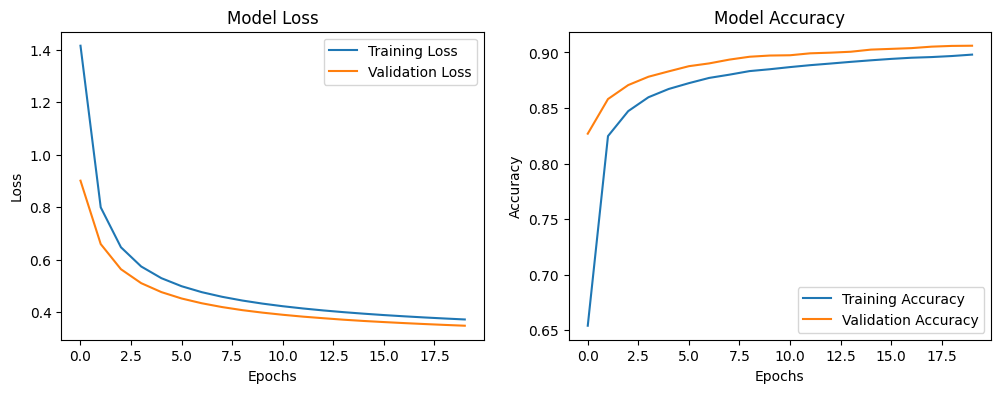

In [ ]:
# Visualizaing model loss and model accuracy
history = history11 # for DRY principle

# Extract loss and accuracy from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.show()


Lower validation loss? Higher validation accuracy? \
→indicates the EPOCH was not enough. \
→**increase the number of EPOCH**.

### Model 1-2

In [ ]:
# Tune the parameter
NB_EPOCH = 300 # 20→300

# Model training
# compile
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

# fit
VERBOSE = 1
history12 = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# evaluate
score12 = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score12[0])
print('Test accuracy:', score12[1])

Epoch 1/300
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9230 - loss: 0.2767 - val_accuracy: 0.9236 - val_loss: 0.2745
Epoch 2/300
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9213 - loss: 0.2782 - val_accuracy: 0.9237 - val_loss: 0.2743
Epoch 3/300
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9235 - loss: 0.2732 - val_accuracy: 0.9239 - val_loss: 0.2742
Epoch 4/300
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9230 - loss: 0.2736 - val_accuracy: 0.9235 - val_loss: 0.2744
Epoch 5/300
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9234 - loss: 0.2698 - val_accuracy: 0.9236 - val_loss: 0.2742
Epoch 6/300
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9238 - loss: 0.2776 - val_accuracy: 0.9234 - val_loss: 0.2741
Epoch 7/300
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9218 - loss: 0.2796 - val_accuracy: 0.9239 - val_loss: 0.2741
Epoch 8/300
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9227 - loss: 0.2740 - val_accu

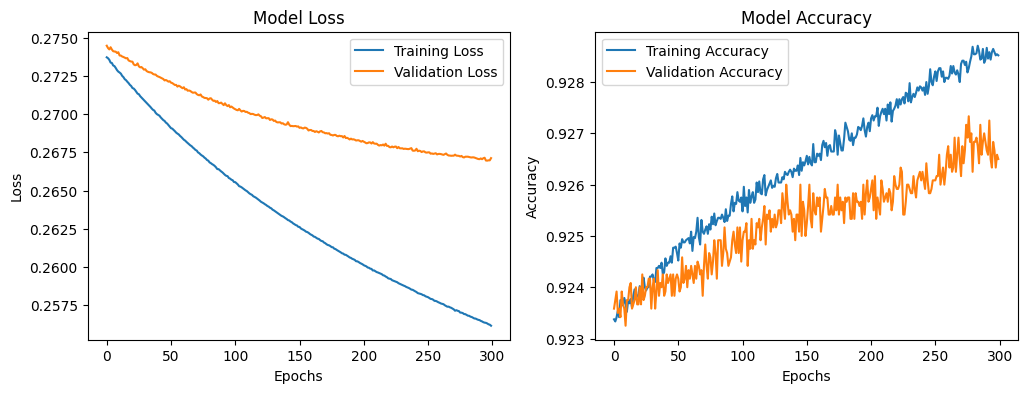

In [ ]:
# Visualizaing model loss and model accuracy
history = history12 # for DRY principle

# Extract loss and accuracy from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.show()


Now the training loss is lower (better) than the validation loss, and the training accuracy is higher (better) than the validation accuracy. \
→The training went well. \
→However, the EPOCH=300 was leading to my PC's memory shortage.\
→Lower the **EPOCH(=250)**

# 2nd Approach

### Model 2-1
*Architecture*: \
Input→**Hidden Layer** (128)→Dense (10 nodes outputs)→Softmax (activation) \
- Add **one hidden layer** to the 1st model

In [ ]:
# Hyperparameters for network and training
np.random.seed(5511) # for reproducibility
NB_EPOCH = 250
BATCH_SIZE = 128
OPTIMIZER = SGD()    # SGD optimizer
N_HIDDEN = 128       # Nodes of Hidden Layers
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [ ]:
# Model building (NN Architecture)
model = Sequential() # create an empty model
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,))) # 1st Hidden layer with ReLU
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))     # Dence layer; 10 outputs
model.add(Activation('softmax')) # Activation layer; softmax for classification)

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model training
# compile
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

# fit
VERBOSE = 1
history21 = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# evaluate
score21 = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score21[0])
print('Test accuracy:', score21[1])

Epoch 1/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5050 - loss: 1.7434 - val_accuracy: 0.8490 - val_loss: 0.7290
Epoch 2/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8455 - loss: 0.6840 - val_accuracy: 0.8806 - val_loss: 0.4917
Epoch 3/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8715 - loss: 0.5084 - val_accuracy: 0.8926 - val_loss: 0.4139
Epoch 4/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8881 - loss: 0.4311 - val_accuracy: 0.9007 - val_loss: 0.3749
Epoch 5/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8939 - loss: 0.3947 - val_accuracy: 0.9053 - val_loss: 0.3494
Epoch 6/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9008 - loss: 0.3670 - val_accuracy: 0.9093 - val_loss: 0.3320
Epoch 7/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9028 - loss: 0.3529 - val_accuracy: 0.9119 - val_loss: 0.3181
Epoch 8/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9080 - loss: 0.3343 - val_accu

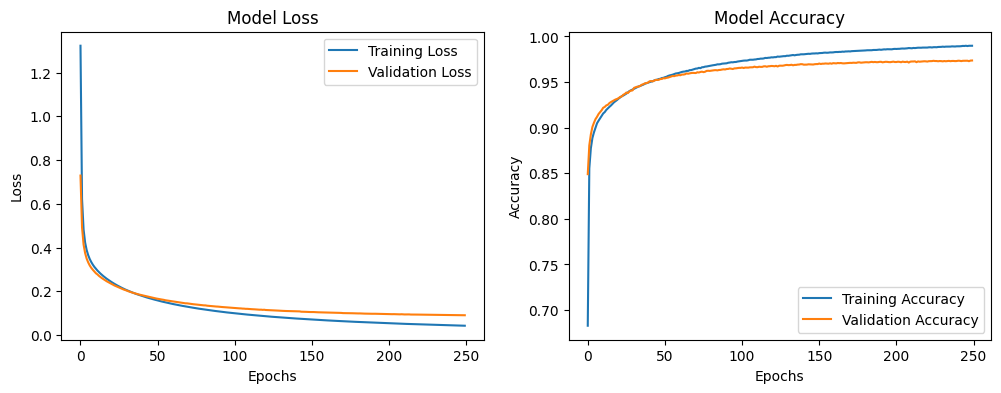

In [ ]:
# Visualizaing model loss and model accuracy
history = history21 # for DRY principle

# Extract loss and accuracy from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.show()


### Model 2-2
*Architecture*: \
Input→**Hidden Layer** (128)→**Hidden Layer** (128)→Dense (10 nodes outputs)→Softmax (activation) \
- Add **2 hidden layers** to the 1st model

In [ ]:
# Hyperparameters for network and training
np.random.seed(5511) # for reproducibility
NB_EPOCH = 250
BATCH_SIZE = 128
OPTIMIZER = SGD()    # SGD optimizer
N_HIDDEN = 128       # Nodes of Hidden Layers
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [ ]:
# Model building (NN Architecture)
model = Sequential() # create an empty model
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,))) # 1st Hidden layer with ReLU
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))                          # 2nd Hidden layer with ReLU
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))     # Dence layer; 10 outputs
model.add(Activation('softmax')) # Activation layer; softmax for classification)

# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model training
# compile
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

# fit
VERBOSE = 1
history22 = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# evaluate
score22 = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score22[0])
print('Test accuracy:', score22[1])

Epoch 1/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4384 - loss: 1.8942 - val_accuracy: 0.8361 - val_loss: 0.7419
Epoch 2/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8381 - loss: 0.6661 - val_accuracy: 0.8825 - val_loss: 0.4504
Epoch 3/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8793 - loss: 0.4563 - val_accuracy: 0.8981 - val_loss: 0.3740
Epoch 4/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8910 - loss: 0.3891 - val_accuracy: 0.9047 - val_loss: 0.3357
Epoch 5/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9028 - loss: 0.3466 - val_accuracy: 0.9111 - val_loss: 0.3118
Epoch 6/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9091 - loss: 0.3271 - val_accuracy: 0.9161 - val_loss: 0.2946
Epoch 7/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9127 - loss: 0.3082 - val_accuracy: 0.9206 - val_loss: 0.2811
Epoch 8/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9162 - loss: 0.2999 - val_accu

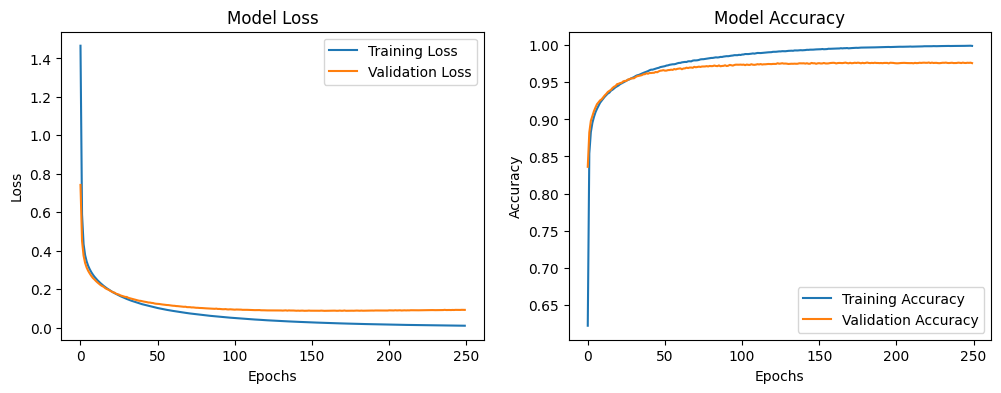

In [ ]:
# Visualizaing model loss and model accuracy
history = history22 # for DRY principle

# Extract loss and accuracy from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.show()


### Model 2-3
*Architecture*: \
Input→**Hidden Layers** (64)→**Hidden Layers** (32)→Dense (10 nodes outputs)→Softmax (activation)
- Tweak the hidden layers' hyperparameters

In [ ]:
# Hyperparameters for network and training
np.random.seed(5511) # for reproducibility
NB_EPOCH = 250
BATCH_SIZE = 128
OPTIMIZER = SGD()    # SGD optimizer
N_HIDDEN = 128       # Nodes of Hidden Layers
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [ ]:
# Model building (NN Architecture)
model = Sequential() # create an empty model
model.add(Dense(int(N_HIDDEN/2), input_shape=(RESHAPED,))) # 1st Hidden layer (64 nodes) with ReLU
model.add(Activation('relu'))
model.add(Dense(int(N_HIDDEN/4)))                          # 2nd Hidden layer (32 nodes) with ReLU
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))     # Dence layer; 10 outputs
model.add(Activation('softmax')) # Activation layer; softmax for classification)

# Model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model training
# compile
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

# fit
VERBOSE = 1
history23 = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# evaluate
score23 = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score23[0])
print('Test accuracy:', score23[1])

Epoch 1/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3980 - loss: 1.9018 - val_accuracy: 0.8083 - val_loss: 0.8097
Epoch 2/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8169 - loss: 0.7339 - val_accuracy: 0.8732 - val_loss: 0.4889
Epoch 3/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8726 - loss: 0.4873 - val_accuracy: 0.8931 - val_loss: 0.3903
Epoch 4/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8899 - loss: 0.4023 - val_accuracy: 0.9029 - val_loss: 0.3472
Epoch 5/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9001 - loss: 0.3587 - val_accuracy: 0.9087 - val_loss: 0.3212
Epoch 6/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9079 - loss: 0.3295 - val_accuracy: 0.9133 - val_loss: 0.3014
Epoch 7/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9097 - loss: 0.3182 - val_accuracy: 0.9164 - val_loss: 0.2879
Epoch 8/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9177 - loss: 0.2942 - val_accu

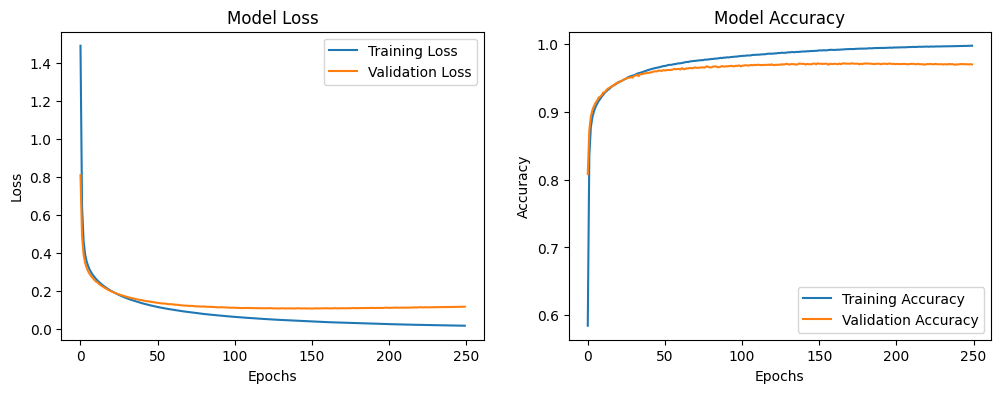

In [ ]:
# Visualizaing model loss and model accuracy
history = history23 # for DRY principle

# Extract loss and accuracy from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.show()


### Summarize 2nd approach

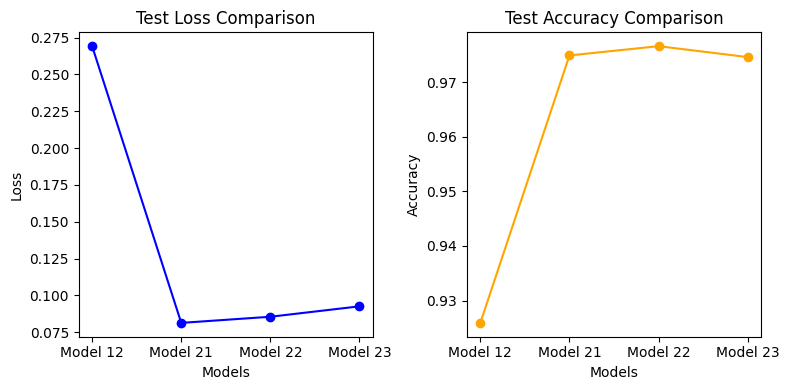

In [ ]:
# Test scores and accuracies for each model
scores = [score12[0], score21[0], score22[0], score23[0]]  # Loss values
accuracies = [score12[1], score21[1], score22[1], score23[1]]  # Accuracy values

# Labels for the models
models = ['Model 12', 'Model 21', 'Model 22', 'Model 23']

# Define the positions for the data points (x-axis)
index = np.arange(len(models))

# Create a figure for loss and accuracy with a smaller figure size
plt.figure(figsize=(8, 4))  # width=8 inches, height=4 inches

# Line and dot plot for the test loss
plt.subplot(1, 2, 1)
plt.plot(index, scores, label='Test Loss', marker='o', linestyle='-', color='b')  # Line plot with dots
plt.title('Test Loss Comparison')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.xticks(index, models)

# Line and dot plot for the test accuracy
plt.subplot(1, 2, 2)
plt.plot(index, accuracies, label='Test Accuracy', marker='o', linestyle='-', color='orange')  # Line plot with dots
plt.title('Test Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(index, models)

# Show the plots
plt.tight_layout()
plt.show()

This time we adopt **Model-22**.

# 3rd Approach

### Model 3
*Architecture*: \
Input→Hidden Layers (128)→Hidden Layers (128)→Dense (10 nodes outputs)→Softmax (activation)
- Model22
- **Dropout Layer**

In [ ]:
# Hyperparameters for network and training
np.random.seed(5511) # for reproducibility
NB_EPOCH = 250
BATCH_SIZE = 128
OPTIMIZER = SGD()    # SGD optimizer
N_HIDDEN = 128       # Nodes of Hidden Layers
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3        # Dropout ratio

In [ ]:
# Model building (NN Architecture)
model = Sequential() # create an empty model
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,))) # 1st Hidden layer with ReLU
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))      # Dropout
model.add(Dense(N_HIDDEN))                          # 2nd Hidden layer with ReLU
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))      # Dropout
model.add(Dense(NB_CLASSES))     # Dence layer; 10 outputs
model.add(Activation('softmax')) # Activation layer; softmax for classification)

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model training
# compile
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

# fit
VERBOSE = 1
history3 = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# evaluate
score3 = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score3[0])
print('Test accuracy:', score3[1])

Epoch 1/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3466 - loss: 1.9413 - val_accuracy: 0.8222 - val_loss: 0.8648
Epoch 2/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6928 - loss: 0.9919 - val_accuracy: 0.8734 - val_loss: 0.5344
Epoch 3/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7753 - loss: 0.7260 - val_accuracy: 0.8904 - val_loss: 0.4234
Epoch 4/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8135 - loss: 0.6138 - val_accuracy: 0.9030 - val_loss: 0.3677
Epoch 5/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8349 - loss: 0.5455 - val_accuracy: 0.9085 - val_loss: 0.3353
Epoch 6/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8540 - loss: 0.4927 - val_accuracy: 0.9127 - val_loss: 0.3113
Epoch 7/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8661 - loss: 0.4503 - val_accuracy: 0.9176 - val_loss: 0.2921
Epoch 8/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8769 - loss: 0.4252 - val_accu

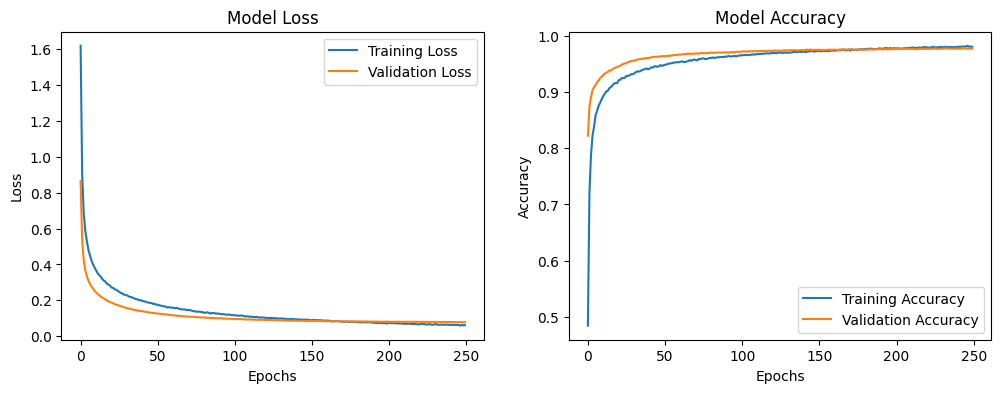

In [ ]:
# Visualizaing model loss and model accuracy
history = history3 # for DRY principle

# Extract loss and accuracy from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.show()


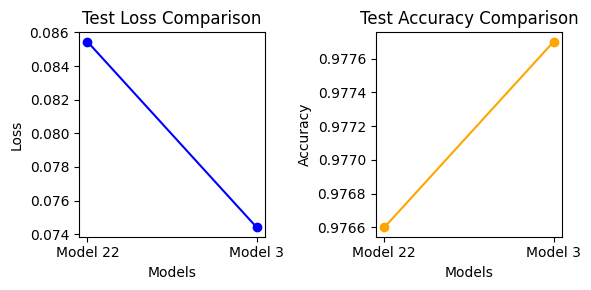

In [ ]:
# Test scores and accuracies for each model
scores = [score22[0], score3[0]]  # Loss values
accuracies = [score22[1], score3[1]]  # Accuracy values

# Labels for the models
models = ['Model 22', 'Model 3']

# Define the positions for the data points (x-axis)
index = np.arange(len(models))

# Create a figure for loss and accuracy with a smaller figure size
plt.figure(figsize=(6, 3))  # width=6 inches, height=3 inches

# Line and dot plot for the test loss
plt.subplot(1, 2, 1)
plt.plot(index, scores, label='Test Loss', marker='o', linestyle='-', color='b')  # Line plot with dots
plt.title('Test Loss Comparison')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.xticks(index, models)

# Line and dot plot for the test accuracy
plt.subplot(1, 2, 2)
plt.plot(index, accuracies, label='Test Accuracy', marker='o', linestyle='-', color='orange')  # Line plot with dots
plt.title('Test Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(index, models)

# Show the plots
plt.tight_layout()
plt.show()

Clearly, **Model-3** outperformed Model_22.

# 4th Approach

### Model 4-1
*Architecture*: \
Input→Hidden Layers (128)→Hidden Layers (128)→Dense (10 nodes outputs)→Softmax (activation)
- Model_3
- Dropout
- **RMSprop optimizer**

In [ ]:
# Hyperparameters for network and training
np.random.seed(5511) # for reproducibility
NB_EPOCH = 250
BATCH_SIZE = 128
OPTIMIZER = RMSprop() # RMSprop optimizer
N_HIDDEN = 128       # Nodes of Hidden Layers
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3        # Dropout ratio

In [ ]:
# Model building (NN Architecture)
model = Sequential() # create an empty model
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,))) # 1st Hidden layer with ReLU
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))      # Dropout
model.add(Dense(N_HIDDEN))                          # 2nd Hidden layer with ReLU
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))      # Dropout
model.add(Dense(NB_CLASSES))     # Dence layer; 10 outputs
model.add(Activation('softmax')) # Activation layer; softmax for classification)

# Model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model training
# compile
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

# fit
VERBOSE = 1
history41 = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# evaluate
score41 = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score41[0])
print('Test accuracy:', score41[1])

Epoch 1/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7652 - loss: 0.7696 - val_accuracy: 0.9434 - val_loss: 0.1891
Epoch 2/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9256 - loss: 0.2473 - val_accuracy: 0.9586 - val_loss: 0.1415
Epoch 3/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9469 - loss: 0.1828 - val_accuracy: 0.9646 - val_loss: 0.1208
Epoch 4/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9560 - loss: 0.1510 - val_accuracy: 0.9686 - val_loss: 0.1073
Epoch 5/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9615 - loss: 0.1313 - val_accuracy: 0.9711 - val_loss: 0.0979
Epoch 6/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9637 - loss: 0.1180 - val_accuracy: 0.9712 - val_loss: 0.0994
Epoch 7/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9675 - loss: 0.1133 - val_accuracy: 0.9719 - val_loss: 0.0976
Epoch 8/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.1027 - val_accu

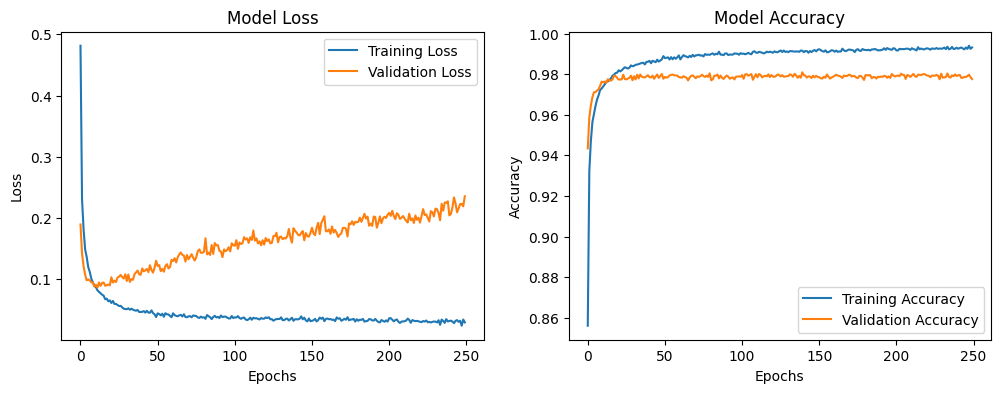

In [ ]:
# Visualizaing model loss and model accuracy
history = history41 # for DRY principle

# Extract loss and accuracy from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.show()


The model **reached convergence faster** than the previous models (optimized by SGD).

### Model 4-2
*Architecture*: \
Input→Hidden Layers (128)→Hidden Layers (128)→Dense (10 nodes outputs)→Softmax (activation)
- Model_3
- Dropout
- **Adam optimizer**

In [ ]:
# Hyperparameters for network and training
np.random.seed(5511) # for reproducibility
NB_EPOCH = 250
BATCH_SIZE = 128
OPTIMIZER = Adam()   # Adam optimizer
N_HIDDEN = 128       # Nodes of Hidden Layers
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3        # Dropout ratio

In [ ]:
# Model building (NN Architecture)
model = Sequential() # create an empty model
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,))) # 1st Hidden layer with ReLU
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))      # Dropout
model.add(Dense(N_HIDDEN))                          # 2nd Hidden layer with ReLU
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))      # Dropout
model.add(Dense(NB_CLASSES))     # Dence layer; 10 outputs
model.add(Activation('softmax')) # Activation layer; softmax for classification)

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model training
# compile
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

# fit
VERBOSE = 1
history42 = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# evaluate
score42 = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score42[0])
print('Test accuracy:', score42[1])

Epoch 1/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7213 - loss: 0.8773 - val_accuracy: 0.9416 - val_loss: 0.1951
Epoch 2/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9253 - loss: 0.2480 - val_accuracy: 0.9579 - val_loss: 0.1390
Epoch 3/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9448 - loss: 0.1828 - val_accuracy: 0.9643 - val_loss: 0.1155
Epoch 4/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9548 - loss: 0.1459 - val_accuracy: 0.9673 - val_loss: 0.1074
Epoch 5/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9616 - loss: 0.1308 - val_accuracy: 0.9718 - val_loss: 0.0977
Epoch 6/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9634 - loss: 0.1189 - val_accuracy: 0.9727 - val_loss: 0.0913
Epoch 7/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.0993 - val_accuracy: 0.9732 - val_loss: 0.0866
Epoch 8/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9715 - loss: 0.0958 - val_accu

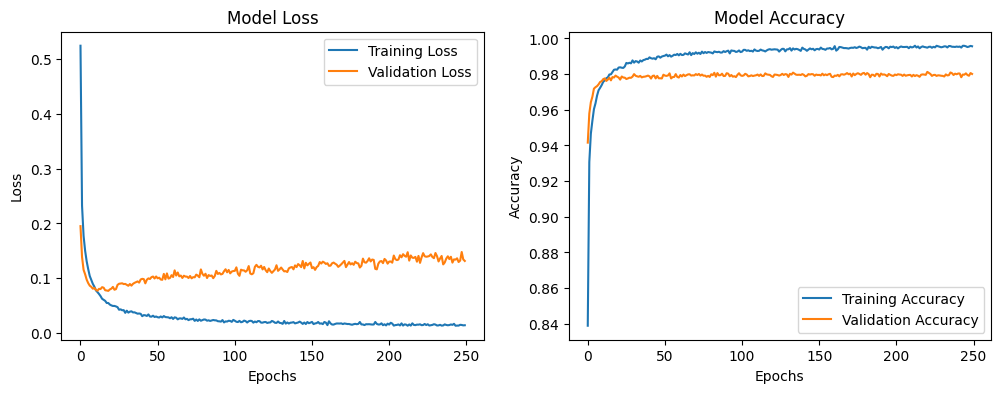

In [ ]:
# Visualizaing model loss and model accuracy
history = history42 # for DRY principle

# Extract loss and accuracy from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.show()


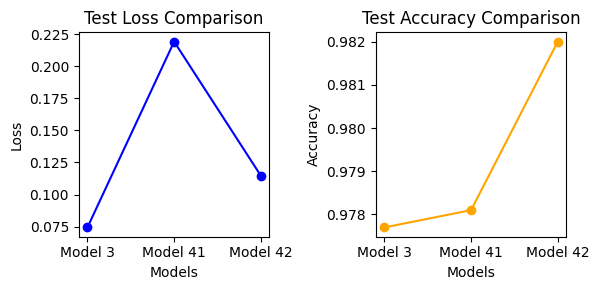

In [ ]:
# Test scores and accuracies for each model
scores = [score3[0], score41[0], score42[0]]  # Loss values
accuracies = [score3[1], score41[1], score42[1]]  # Accuracy values

# Labels for the models
models = ['Model 3', 'Model 41', 'Model 42']

# Define the positions for the data points (x-axis)
index = np.arange(len(models))

# Create a figure for loss and accuracy with a smaller figure size
plt.figure(figsize=(6, 3))  # width=6 inches, height=3 inches

# Line and dot plot for the test loss
plt.subplot(1, 2, 1)
plt.plot(index, scores, label='Test Loss', marker='o', linestyle='-', color='b')  # Line plot with dots
plt.title('Test Loss Comparison')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.xticks(index, models)

# Line and dot plot for the test accuracy
plt.subplot(1, 2, 2)
plt.plot(index, accuracies, label='Test Accuracy', marker='o', linestyle='-', color='orange')  # Line plot with dots
plt.title('Test Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(index, models)

# Show the plots
plt.tight_layout()
plt.show()

Model-3 or Model-42 seems the best model.

# Review and Summary

### Comparison of the models

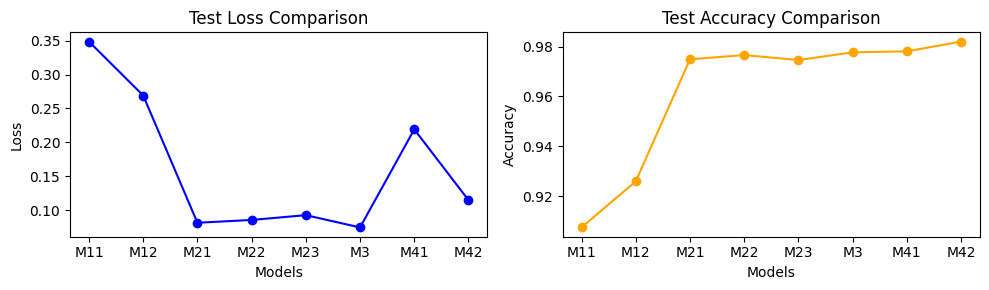

In [ ]:
# Test scores and accuracies for each model
scores = [score11[0],score12[0],score21[0],score22[0],score23[0],score3[0],score41[0],score42[0]]  # Loss values
accuracies = [score11[1],score12[1],score21[1],score22[1],score23[1],score3[1],score41[1],score42[1]]  # Accuracy values

# Labels for the models
models = ['M11','M12','M21','M22','M23','M3','M41','M42']

# Define the positions for the data points (x-axis)
index = np.arange(len(models))

# Create a figure for loss and accuracy with a smaller figure size
plt.figure(figsize=(10, 3))  # width=6 inches, height=3 inches

# Line and dot plot for the test loss
plt.subplot(1, 2, 1)
plt.plot(index, scores, label='Test Loss', marker='o', linestyle='-', color='b')  # Line plot with dots
plt.title('Test Loss Comparison')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.xticks(index, models)

# Line and dot plot for the test accuracy
plt.subplot(1, 2, 2)
plt.plot(index, accuracies, label='Test Accuracy', marker='o', linestyle='-', color='orange')  # Line plot with dots
plt.title('Test Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(index, models)

# Show the plots
plt.tight_layout()
plt.show()

1. In terms of **Loss, Model-3** showed the best performance. \
2. In terms of **Accuracy, Model-42** performed the best performance. However, the difference between M3 and M42 is not significant. \
3. Both models have **the same number of parateters** (118,282). \
4. The main difference lies in **the optimization method** (M3: SGD / M42: Adam). \
→ When examining the training process, M42(Adam) reaches convergence faster than M3(SGD).
- Given points 2 & 4, I would choose M42 as the best model.

### Save and Reload the best model

In [ ]:
from keras.models import model_from_json, load_model
from google.colab import files

# Save the model architecture to a JSON file
json_model = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(json_model)

# Save the model's weights and architecture to a .h5 file
model.save('my_model.h5')  # Save the full model (architecture + weights)

# Download the model file
files.download('my_model.h5')

# Optionally, download the model architecture JSON file if saved
files.download('model_architecture.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from keras.models import model_from_json, load_model

# Load the model
model = load_model('/content/drive/MyDrive/Edu/MSDS/_5511-IntroToDL/my_model.h5')

# Check model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,284 (462.05 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Prediction

In [25]:
# Use the model to predict the classes of the test set
Y_test_pred = model.predict(X_test)

# Convert predicted probabilities to class labels (Y_test_pred is an array of probabilities)
Y_test_pred_classes = np.argmax(Y_test_pred, axis=1)

# Convert one-hot encoded true labels back to class labels
Y_test_true_classes = np.argmax(Y_test, axis=1)

# Find indices of correctly classified samples
correct_indices = np.where(Y_test_pred_classes == Y_test_true_classes)[0]
# Find indices of misclassified samples
incorrect_indices = np.where(Y_test_pred_classes != Y_test_true_classes)[0]

# Output the number of misclassified samples
print(f"Sample size: {len(Y_test)}")
print(f"Misclassified samples: {len(incorrect_indices)}")
print(f"Error rate: {len(incorrect_indices)/len(Y_test)}")
print(f"Accuracy: {1-len(incorrect_indices)/len(Y_test)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Sample size: 10000
Misclassified samples: 180
Error rate: 0.018
Accuracy: 0.982


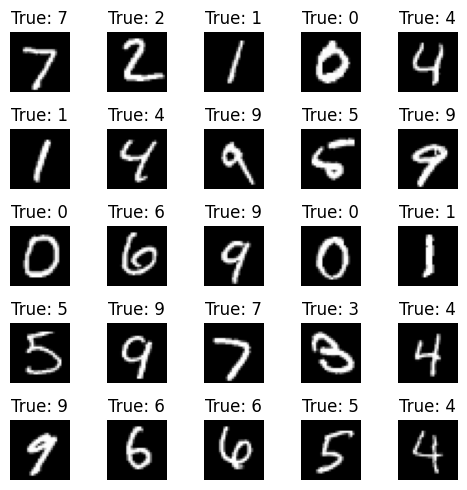

In [26]:
# Display 25 correctly classified samples in a 5x5 grid
num_samples = 25
plt.figure(figsize=(5, 5))  # Set the figure size to accommodate 5x5 images

for i, idx in enumerate(correct_indices[:num_samples]):
    plt.subplot(5, 5, i + 1)  # Create a subplot with 5 rows and 5 columns
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {Y_test_true_classes[idx]}")
    plt.axis('off')  # Hide the axes for a cleaner look

plt.tight_layout()  # Adjust spacing between the subplots
plt.show()

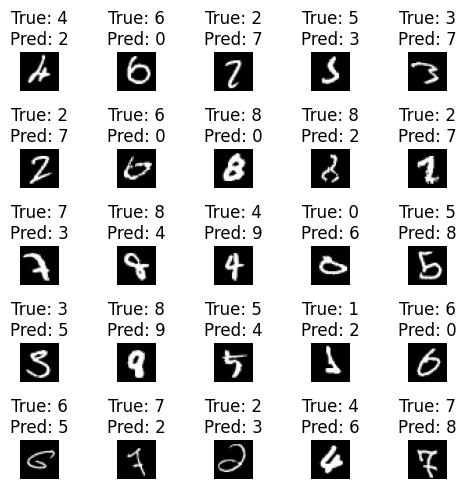

In [24]:
import matplotlib.pyplot as plt

# Display 25 misclassified samples in a 5x5 grid
num_samples = 25
plt.figure(figsize=(5, 5))  # Set the figure size to accommodate 5x5 images

for i, idx in enumerate(incorrect_indices[:num_samples]):
    plt.subplot(5, 5, i + 1)  # Create a subplot with 5 rows and 5 columns
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {Y_test_true_classes[idx]}\nPred: {Y_test_pred_classes[idx]}")
    plt.axis('off')  # Hide the axes for a cleaner look

plt.tight_layout()  # Adjust spacing between the subplots
plt.show()


### Summary

- We built neural network classifier models for handwritten digits step by step.
- The best model achieved an accuracy of 0.982.
- The misclasified samples were certainly difficult to classify, even for humans.